# Loading in Data and Setting up the DF

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, cross_val_predict
import umap
from sklearn.preprocessing import StandardScaler
from lifelines import KaplanMeierFitter

In [32]:
df = pd.read_csv('gene_set_full_df', sep='\t')
df

,TCGA Participant Barcode,Immune Subtype,ENSG00000000003,ENSG00000000938,ENSG00000002549,ENSG00000002726,ENSG00000002933,ENSG00000004468,ENSG00000005302,ENSG00000006062,...,ENSG00000265972,ENSG00000266074,ENSG00000267467,ENSG00000269404,ENSG00000270999,ENSG00000271503,ENSG00000273749,ENSG00000274736,ENSG00000275385,ENSG00000276566
0,TCGA-02-2485,C4,79.259265,6.643151,180.681133,0.090647,82.140709,28.637477,27.956626,7.839017,...,118.450700,6.169188,0.440010,0.281370,0.0,10.181587,48.168662,0.341059,0.949180,0.000000
1,TCGA-05-4410,C3,32.748015,10.113990,90.549052,11.822552,78.850117,15.200869,13.416809,5.517317,...,811.904960,5.790760,0.408701,4.601847,0.0,89.767850,48.119598,0.775307,35.949800,4.710780
2,TCGA-05-4424,C2,57.583244,14.078790,121.773148,33.468457,157.081749,7.759850,29.774921,6.494535,...,278.206262,2.881664,0.366937,1.897250,0.0,46.658927,57.234817,2.949572,81.749300,2.082360
3,TCGA-05-4425,C6,27.844002,11.812519,129.100818,3.831593,89.481817,2.910681,12.759269,7.397155,...,307.494101,7.002104,0.231589,4.057865,0.0,63.016300,74.851751,1.175897,144.554500,0.372232
4,TCGA-06-0156,C4,58.939523,10.858051,100.064581,0.154817,184.861346,10.855256,28.613674,10.896783,...,200.131620,6.203811,0.459334,1.801397,0.0,34.085660,26.016317,2.358993,27.465400,1.868890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8997,TCGA-ZJ-AAXJ,C2,14.516529,1.266809,9.294427,1.943475,6.287105,1.242228,8.690793,3.158169,...,101.716239,1.174335,0.155927,0.347483,0.0,17.608844,22.626533,0.161633,5.306330,0.623718
8998,TCGA-ZJ-AB0I,C2,27.312392,1.481216,49.401606,1.285174,5.502288,0.137200,19.352547,5.706432,...,137.626600,2.748331,0.177743,0.238590,0.0,39.198254,57.490276,0.325526,9.275790,0.000000
8999,TCGA-ZN-A9VU,C2,7.093416,4.913640,214.420303,0.078717,33.854365,14.356921,10.879736,5.786081,...,246.533440,4.076389,0.222226,0.988597,0.0,38.483170,77.835267,0.330356,1.086547,7.394680
9000,TCGA-ZN-A9VW,C6,12.423349,4.924310,210.633015,0.052957,168.279541,8.197283,17.094445,25.347770,...,1338.167620,3.660169,0.123595,0.437710,0.0,98.137200,55.939760,0.571140,1.350103,0.360392


In [33]:
df.rename(columns={"Immune Subtype": "immune_subtype"}, inplace=True)

In [34]:
df.rename(columns={"TCGA Participant Barcode": "tcga_participant_barcode"}, inplace=True)

In [35]:
df

,tcga_participant_barcode,immune_subtype,ENSG00000000003,ENSG00000000938,ENSG00000002549,ENSG00000002726,ENSG00000002933,ENSG00000004468,ENSG00000005302,ENSG00000006062,...,ENSG00000265972,ENSG00000266074,ENSG00000267467,ENSG00000269404,ENSG00000270999,ENSG00000271503,ENSG00000273749,ENSG00000274736,ENSG00000275385,ENSG00000276566
0,TCGA-02-2485,C4,79.259265,6.643151,180.681133,0.090647,82.140709,28.637477,27.956626,7.839017,...,118.450700,6.169188,0.440010,0.281370,0.0,10.181587,48.168662,0.341059,0.949180,0.000000
1,TCGA-05-4410,C3,32.748015,10.113990,90.549052,11.822552,78.850117,15.200869,13.416809,5.517317,...,811.904960,5.790760,0.408701,4.601847,0.0,89.767850,48.119598,0.775307,35.949800,4.710780
2,TCGA-05-4424,C2,57.583244,14.078790,121.773148,33.468457,157.081749,7.759850,29.774921,6.494535,...,278.206262,2.881664,0.366937,1.897250,0.0,46.658927,57.234817,2.949572,81.749300,2.082360
3,TCGA-05-4425,C6,27.844002,11.812519,129.100818,3.831593,89.481817,2.910681,12.759269,7.397155,...,307.494101,7.002104,0.231589,4.057865,0.0,63.016300,74.851751,1.175897,144.554500,0.372232
4,TCGA-06-0156,C4,58.939523,10.858051,100.064581,0.154817,184.861346,10.855256,28.613674,10.896783,...,200.131620,6.203811,0.459334,1.801397,0.0,34.085660,26.016317,2.358993,27.465400,1.868890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8997,TCGA-ZJ-AAXJ,C2,14.516529,1.266809,9.294427,1.943475,6.287105,1.242228,8.690793,3.158169,...,101.716239,1.174335,0.155927,0.347483,0.0,17.608844,22.626533,0.161633,5.306330,0.623718
8998,TCGA-ZJ-AB0I,C2,27.312392,1.481216,49.401606,1.285174,5.502288,0.137200,19.352547,5.706432,...,137.626600,2.748331,0.177743,0.238590,0.0,39.198254,57.490276,0.325526,9.275790,0.000000
8999,TCGA-ZN-A9VU,C2,7.093416,4.913640,214.420303,0.078717,33.854365,14.356921,10.879736,5.786081,...,246.533440,4.076389,0.222226,0.988597,0.0,38.483170,77.835267,0.330356,1.086547,7.394680
9000,TCGA-ZN-A9VW,C6,12.423349,4.924310,210.633015,0.052957,168.279541,8.197283,17.094445,25.347770,...,1338.167620,3.660169,0.123595,0.437710,0.0,98.137200,55.939760,0.571140,1.350103,0.360392


In [36]:
value_counts = df['immune_subtype'].value_counts()

print(value_counts)


C2    2560
C1    2381
C3    2373
C4    1133
C5     376
C6     179
Name: immune_subtype, dtype: int64


# Making UMAP for Misclassified Points

In [37]:
#df = df.drop(columns='tcga_participant_barcode')
df

,tcga_participant_barcode,immune_subtype,ENSG00000000003,ENSG00000000938,ENSG00000002549,ENSG00000002726,ENSG00000002933,ENSG00000004468,ENSG00000005302,ENSG00000006062,...,ENSG00000265972,ENSG00000266074,ENSG00000267467,ENSG00000269404,ENSG00000270999,ENSG00000271503,ENSG00000273749,ENSG00000274736,ENSG00000275385,ENSG00000276566
0,TCGA-02-2485,C4,79.259265,6.643151,180.681133,0.090647,82.140709,28.637477,27.956626,7.839017,...,118.450700,6.169188,0.440010,0.281370,0.0,10.181587,48.168662,0.341059,0.949180,0.000000
1,TCGA-05-4410,C3,32.748015,10.113990,90.549052,11.822552,78.850117,15.200869,13.416809,5.517317,...,811.904960,5.790760,0.408701,4.601847,0.0,89.767850,48.119598,0.775307,35.949800,4.710780
2,TCGA-05-4424,C2,57.583244,14.078790,121.773148,33.468457,157.081749,7.759850,29.774921,6.494535,...,278.206262,2.881664,0.366937,1.897250,0.0,46.658927,57.234817,2.949572,81.749300,2.082360
3,TCGA-05-4425,C6,27.844002,11.812519,129.100818,3.831593,89.481817,2.910681,12.759269,7.397155,...,307.494101,7.002104,0.231589,4.057865,0.0,63.016300,74.851751,1.175897,144.554500,0.372232
4,TCGA-06-0156,C4,58.939523,10.858051,100.064581,0.154817,184.861346,10.855256,28.613674,10.896783,...,200.131620,6.203811,0.459334,1.801397,0.0,34.085660,26.016317,2.358993,27.465400,1.868890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8997,TCGA-ZJ-AAXJ,C2,14.516529,1.266809,9.294427,1.943475,6.287105,1.242228,8.690793,3.158169,...,101.716239,1.174335,0.155927,0.347483,0.0,17.608844,22.626533,0.161633,5.306330,0.623718
8998,TCGA-ZJ-AB0I,C2,27.312392,1.481216,49.401606,1.285174,5.502288,0.137200,19.352547,5.706432,...,137.626600,2.748331,0.177743,0.238590,0.0,39.198254,57.490276,0.325526,9.275790,0.000000
8999,TCGA-ZN-A9VU,C2,7.093416,4.913640,214.420303,0.078717,33.854365,14.356921,10.879736,5.786081,...,246.533440,4.076389,0.222226,0.988597,0.0,38.483170,77.835267,0.330356,1.086547,7.394680
9000,TCGA-ZN-A9VW,C6,12.423349,4.924310,210.633015,0.052957,168.279541,8.197283,17.094445,25.347770,...,1338.167620,3.660169,0.123595,0.437710,0.0,98.137200,55.939760,0.571140,1.350103,0.360392


Machine Accuracy: 0.7962085308056872


/var/folders/f2/s93pnt0d3hxdjkhfxs6gb1l1rb54ft/T/ipykernel_51572/3443513637.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  correct_points = plt.scatter(
/var/folders/f2/s93pnt0d3hxdjkhfxs6gb1l1rb54ft/T/ipykernel_51572/3443513637.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  incorrect_points = plt.scatter(


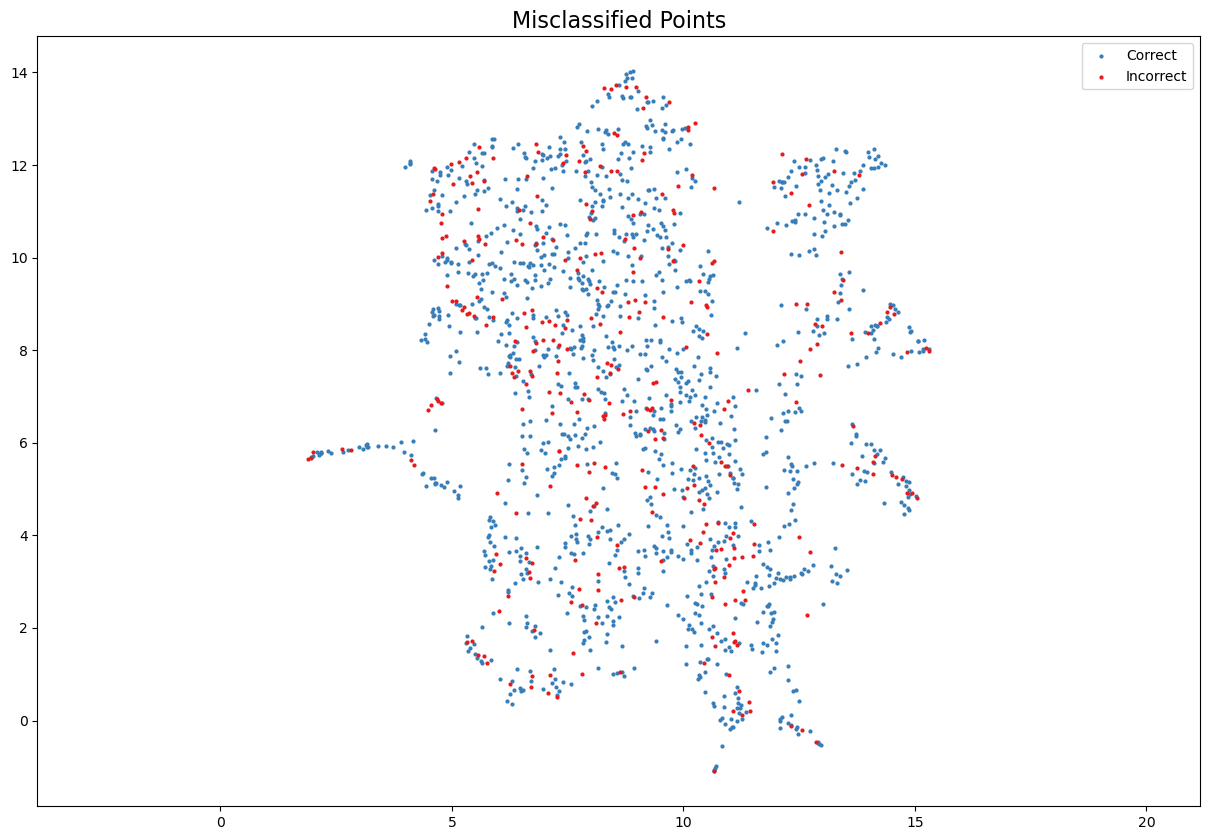

In [38]:
# Making the train/test split
df_train, df_test = train_test_split(df, test_size=0.25)
x_train = df_train.drop(columns=["tcga_participant_barcode", "immune_subtype"]).values
y_train = df_train["immune_subtype"].values
xt, xv, yt, yv = train_test_split(x_train, y_train, test_size=0.25)

# Train the random forest classifier on your training data
rfModel = RandomForestClassifier(n_estimators=500, max_depth=200)
rfModel.fit(xt, yt)

# Predict on validation data
predictions = rfModel.predict(xv)

# Calculate overall machine accuracy
accuracy = np.sum(predictions == yv) / len(yv)
print("Machine Accuracy:", accuracy)

# Apply UMAP on your data
umap_embedding = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=7).fit_transform(xv)

# Create a color palette for correctly and incorrectly classified points
color_palette = sns.color_palette("Set1", n_colors=2)  # Two colors: Correct and Incorrect

# Map each class to a color in the palette
class_to_color = {True: color_palette[1], False: color_palette[0]}  # True for Correct, False for Incorrect

# Set the figure size
plt.figure(figsize=(15, 10))

# Create scatter plot objects for each class
correct_points = plt.scatter(
    umap_embedding[yv == predictions, 0],
    umap_embedding[yv == predictions, 1],
    s=4,
    c=class_to_color[True],
    label='Correct'
)

incorrect_points = plt.scatter(
    umap_embedding[yv != predictions, 0],
    umap_embedding[yv != predictions, 1],
    s=4,
    c=class_to_color[False],
    label='Incorrect'
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('Misclassified Points', fontsize=16)

# Add legend with custom handles
plt.legend(handles=[correct_points, incorrect_points])

plt.show()


# Seeing What The Misclassified Points Look Like Classfied

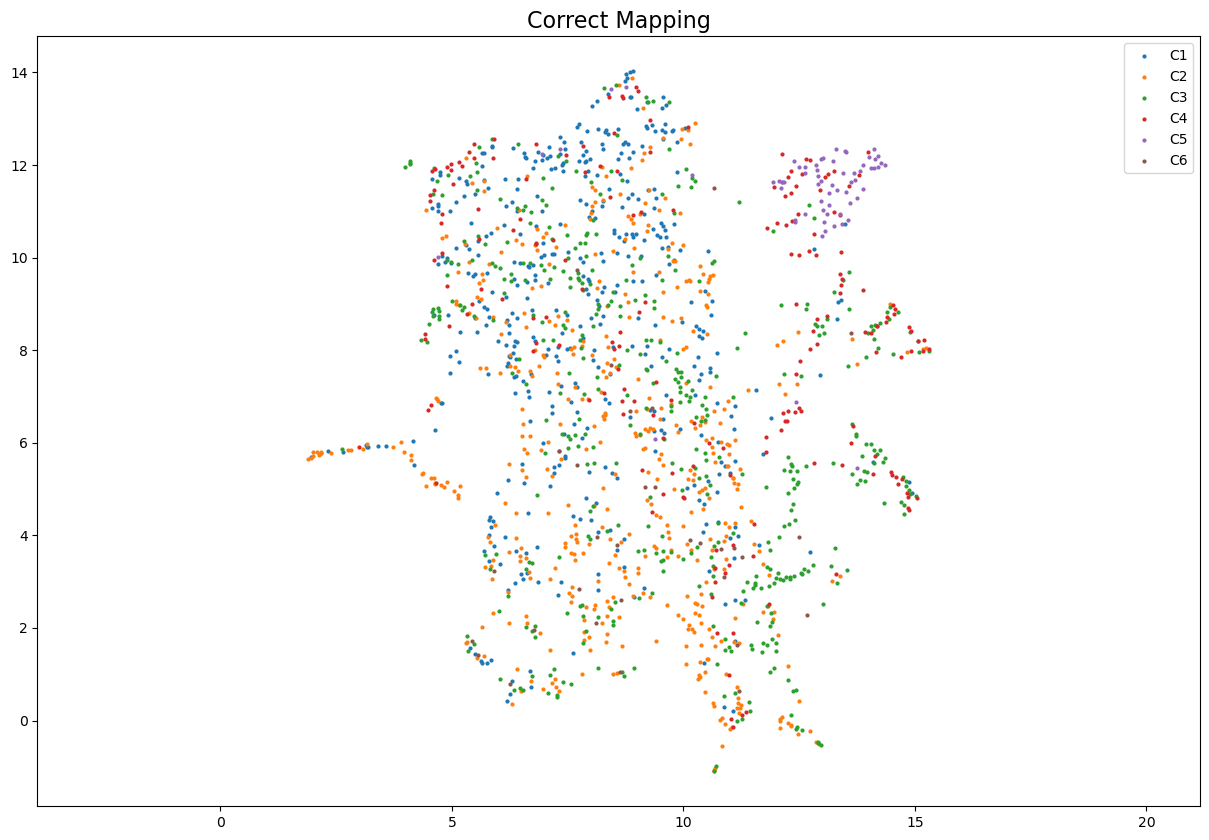

In [39]:
# Apply UMAP on your data
umap_embedding = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=7).fit_transform(xv)

# Create a dictionary to map unique immune_subtype values to colors
unique_subtypes = np.unique(yv)
color_palette = sns.color_palette("tab10", n_colors=len(unique_subtypes))
subtype_to_color = dict(zip(unique_subtypes, color_palette))

# Set the figure size
plt.figure(figsize=(15, 10))

# Create scatter plot objects for each immune_subtype
scatter_handles = []
for subtype, color in subtype_to_color.items():
    subset_indices = (yv == subtype)
    scatter_handle = plt.scatter(
        umap_embedding[subset_indices, 0],
        umap_embedding[subset_indices, 1],
        s=4,
        c=[color],
        label=subtype
    )
    scatter_handles.append(scatter_handle)

plt.gca().set_aspect('equal', 'datalim')
plt.title('Correct Mapping', fontsize=16)

# Add legend with custom handles for each immune_subtype
plt.legend(handles=scatter_handles)

plt.show()

# Making the U-Map (not sorted)

In [40]:
#isolates the signfigant values that will be reduced
x = df.drop(['tcga_participant_barcode', 'immune_subtype'], axis=1)
#seperates the y-value and puts it aside for use later
y = df['immune_subtype']

In [41]:
#making the model
umap_model = umap.UMAP(n_components=2)
#running the x(values) throught to be reduced
embedding = umap_model.fit_transform(x)
#seeing reduced version
embedding

array([[15.007381 ,  3.2400537],
       [ 4.914426 ,  1.1525675],
       [ 7.9694605,  2.2166426],
       ...,
       [ 8.477481 , -0.9646155],
       [ 7.4450564, -1.6535684],
       [ 9.290654 ,  1.6895155]], dtype=float32)

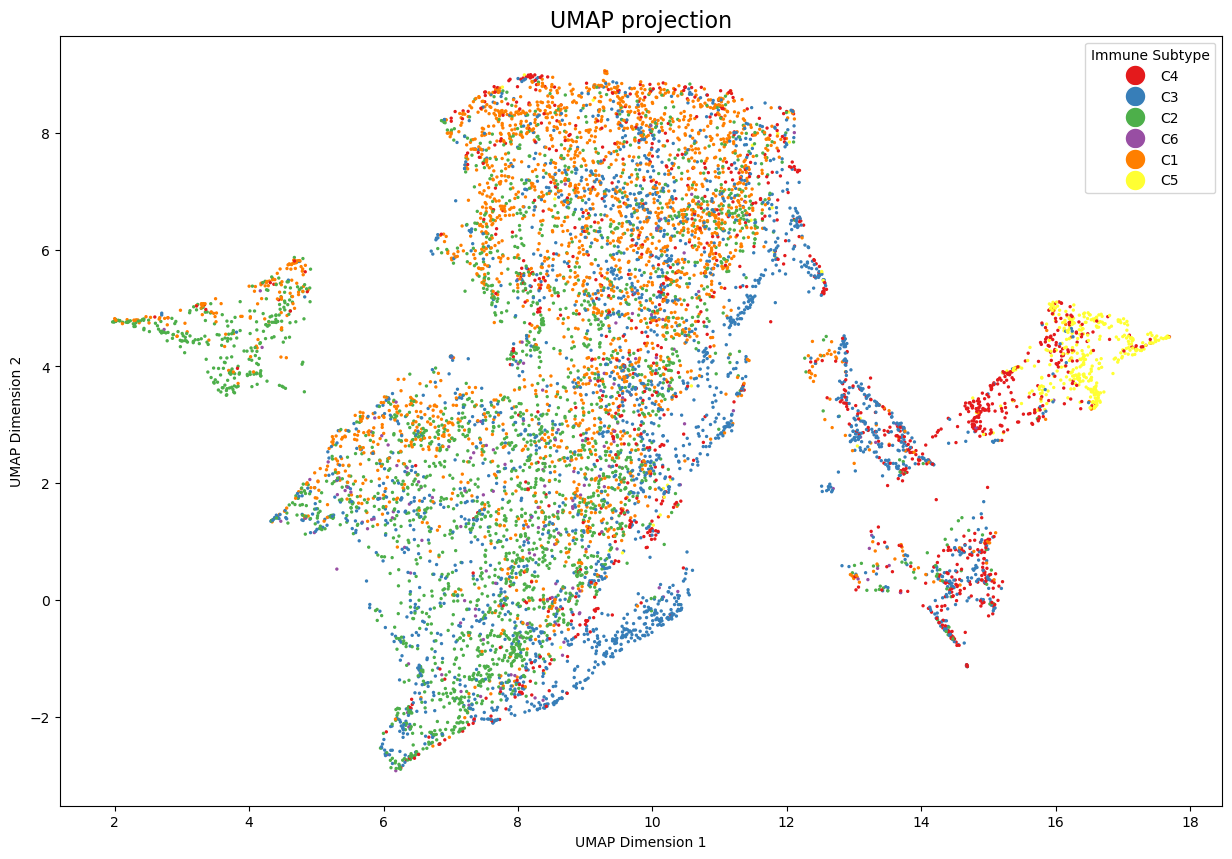

In [42]:
#setting plot size
plt.figure(figsize=(15, 10))
#setting color palate and having it change based on the unque y values
color_palette = sns.color_palette("Set1", n_colors=len(y.unique()))
color_mapping = {species: color for color, species in enumerate(y.unique())}
colors = [color_palette[color_mapping[species]] for species in y]
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors, s=2)

# Adding a legend
legend_labels = y.unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=15, markerfacecolor=color)
                  for label, color in zip(legend_labels, color_palette)]
plt.legend(handles=legend_handles, title="Immune Subtype")

plt.title('UMAP projection', fontsize=16)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

# UMAP of the entire Dataset

## Sorting DF so the Legend is in Order

In [43]:

# Define the desired order
desired_order = ["C1", "C2", "C3", "C4", "C5", "C6"]

# Sort the DataFrame based on the 'Column_to_sort' column using the desired order
df_sorted = df[df['immune_subtype'].isin(desired_order)].sort_values(by=['immune_subtype'], key=lambda col: col.map({val: idx for idx, val in enumerate(desired_order)}))

# Print the sorted DataFrame
df_sorted

,tcga_participant_barcode,immune_subtype,ENSG00000000003,ENSG00000000938,ENSG00000002549,ENSG00000002726,ENSG00000002933,ENSG00000004468,ENSG00000005302,ENSG00000006062,...,ENSG00000265972,ENSG00000266074,ENSG00000267467,ENSG00000269404,ENSG00000270999,ENSG00000271503,ENSG00000273749,ENSG00000274736,ENSG00000275385,ENSG00000276566
1921,TCGA-3B-A9HP,C1,11.594583,4.406692,67.946749,0.465439,84.156429,0.760922,18.264237,13.746092,...,286.787967,9.898479,0.092957,3.082746,0.000000,40.135650,41.826091,0.399227,1.928391,0.00000
5936,TCGA-D5-6533,C1,90.922840,2.688882,110.052623,81.505346,483.355557,1.412301,20.683607,7.836823,...,81.001330,2.701847,0.637189,0.778437,0.160316,9.836573,45.617194,0.305265,12.951730,5.46751
5931,TCGA-D1-A177,C1,17.182080,0.554300,40.694352,18.391933,15.557973,0.225194,7.527834,28.537830,...,147.497600,21.098441,0.000000,0.627473,0.000000,7.870030,66.468640,0.000000,2.625727,0.00000
5928,TCGA-D1-A16R,C1,39.801995,2.825573,54.177553,4.938320,39.437935,0.753132,12.103748,3.709542,...,135.135483,1.009128,0.000000,0.594432,0.000000,20.859734,57.244140,0.092686,11.306840,0.00000
5926,TCGA-D1-A16F,C1,63.173188,4.577430,42.635002,46.455515,10.324238,5.759002,16.541371,7.939135,...,182.132730,1.582215,0.000000,0.606945,0.000000,17.729025,63.327205,1.054340,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826,TCGA-AR-A0TT,C6,3.706540,10.106416,158.210769,0.632195,51.345266,21.378058,31.268695,8.503381,...,215.364580,1.324405,0.173291,7.536303,0.298645,100.529080,57.968099,0.657303,15.845610,26.59740
4831,TCGA-AR-A24T,C6,41.825828,2.552468,116.600487,0.214475,67.465646,1.279970,22.413583,5.803060,...,412.695200,2.024873,0.624021,0.795011,0.648174,22.903493,44.155038,0.183690,0.772245,15.32030
8648,TCGA-E9-A1R3,C6,25.487009,6.408825,48.545101,0.904519,77.909946,0.551660,26.351628,5.753635,...,203.050936,3.216982,0.268924,0.861924,0.000000,15.121620,76.523070,0.084260,9.001380,0.00000
2263,TCGA-CM-5348,C6,17.579842,18.383990,58.624171,110.464455,587.231955,1.007275,12.436026,8.946199,...,715.606920,4.060936,0.465955,0.895588,0.196406,15.143496,64.205272,2.138957,35.317700,0.00000


In [44]:
#isolates the signfigant values that will be reduced
x = df_sorted.drop(['tcga_participant_barcode', 'immune_subtype'], axis=1)
#seperates the y-value and puts it aside for use later
y = df_sorted['immune_subtype']

In [45]:
#making the model
umap_model = umap.UMAP(n_components=2, random_state=11)
#running the x(values) throught to be reduced
embedding = umap_model.fit_transform(x)
#seeing reduced version
embedding

array([[8.017926  , 4.1361084 ],
       [7.9422865 , 5.861159  ],
       [9.526242  , 8.519604  ],
       ...,
       [6.682146  , 0.32770327],
       [7.7729526 , 3.3525255 ],
       [5.2072067 , 3.351073  ]], dtype=float32)

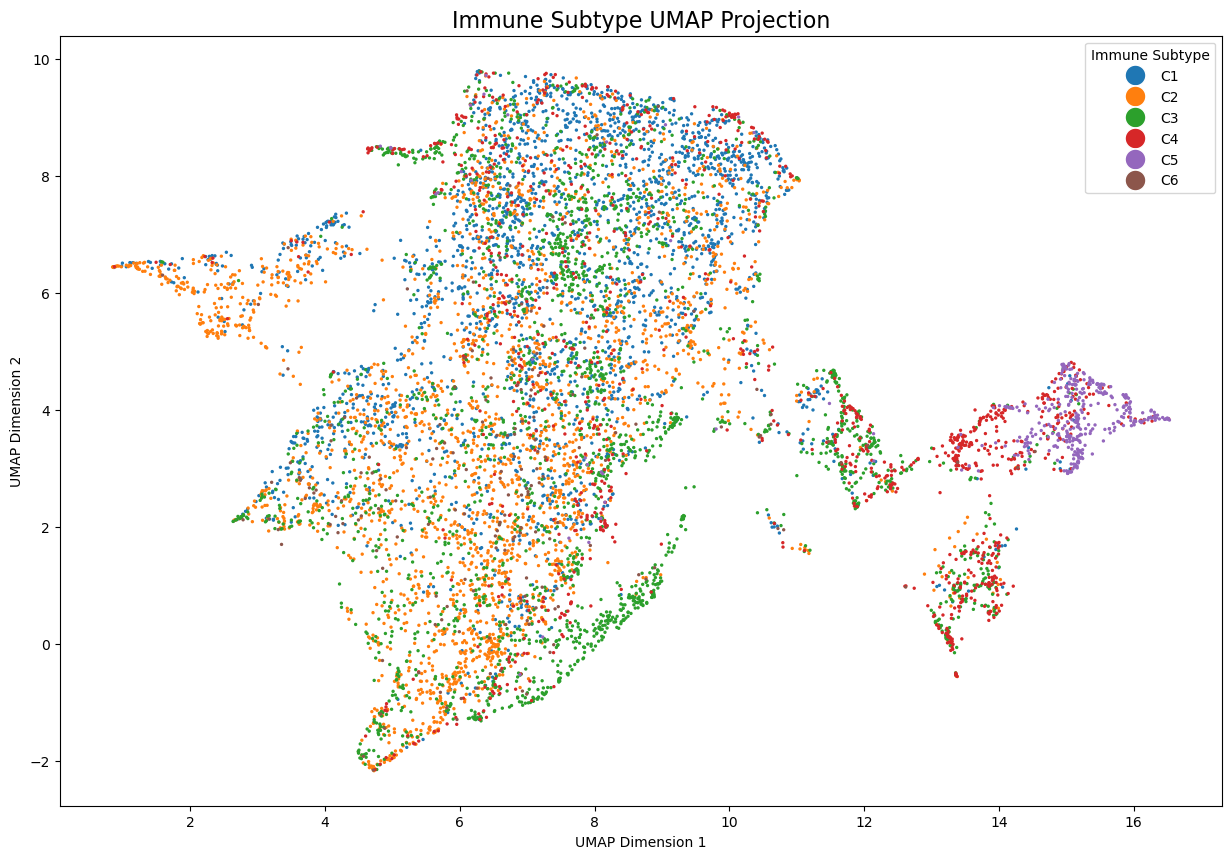

In [46]:
#setting plot size
plt.figure(figsize=(15, 10))
#setting color palate and having it change based on the unque y values
color_palette = sns.color_palette("tab10", n_colors=len(y.unique()))
color_mapping = {species: color for color, species in enumerate(y.unique())}
colors = [color_palette[color_mapping[species]] for species in y]
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors, s=2)

# Adding a legend
legend_labels = y.unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=15, markerfacecolor=color)
                  for label, color in zip(legend_labels, color_palette)]
plt.legend(handles=legend_handles, title="Immune Subtype")

plt.title('Immune Subtype UMAP Projection', fontsize=16)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

# Running Machine on Entire DF and Classifiying Misclassified Points

In [47]:
from sklearn.metrics import accuracy_score

# Features and target
X = df_sorted.drop(columns=["tcga_participant_barcode", "immune_subtype"])
y = df_sorted["immune_subtype"]

# Initialize the model
model = RandomForestClassifier(n_estimators=500, max_depth=200)

# Perform cross-validation predictions
cv_predictions = cross_val_predict(model, X, y, cv=5)

# Calculate accuracy based on cross-validation
accuracy = accuracy_score(y, cv_predictions)
print("Cross-Validation Accuracy:", accuracy)

# Add a new column to the DataFrame to indicate correct predictions
df_sorted["correct_prediction"] = df_sorted["immune_subtype"] == cv_predictions

# Display the DataFrame with the new column
df_sorted

Cross-Validation Accuracy: 0.7964896689624528


,tcga_participant_barcode,immune_subtype,ENSG00000000003,ENSG00000000938,ENSG00000002549,ENSG00000002726,ENSG00000002933,ENSG00000004468,ENSG00000005302,ENSG00000006062,...,ENSG00000266074,ENSG00000267467,ENSG00000269404,ENSG00000270999,ENSG00000271503,ENSG00000273749,ENSG00000274736,ENSG00000275385,ENSG00000276566,correct_prediction
1921,TCGA-3B-A9HP,C1,11.594583,4.406692,67.946749,0.465439,84.156429,0.760922,18.264237,13.746092,...,9.898479,0.092957,3.082746,0.000000,40.135650,41.826091,0.399227,1.928391,0.00000,False
5936,TCGA-D5-6533,C1,90.922840,2.688882,110.052623,81.505346,483.355557,1.412301,20.683607,7.836823,...,2.701847,0.637189,0.778437,0.160316,9.836573,45.617194,0.305265,12.951730,5.46751,True
5931,TCGA-D1-A177,C1,17.182080,0.554300,40.694352,18.391933,15.557973,0.225194,7.527834,28.537830,...,21.098441,0.000000,0.627473,0.000000,7.870030,66.468640,0.000000,2.625727,0.00000,True
5928,TCGA-D1-A16R,C1,39.801995,2.825573,54.177553,4.938320,39.437935,0.753132,12.103748,3.709542,...,1.009128,0.000000,0.594432,0.000000,20.859734,57.244140,0.092686,11.306840,0.00000,True
5926,TCGA-D1-A16F,C1,63.173188,4.577430,42.635002,46.455515,10.324238,5.759002,16.541371,7.939135,...,1.582215,0.000000,0.606945,0.000000,17.729025,63.327205,1.054340,0.000000,0.00000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826,TCGA-AR-A0TT,C6,3.706540,10.106416,158.210769,0.632195,51.345266,21.378058,31.268695,8.503381,...,1.324405,0.173291,7.536303,0.298645,100.529080,57.968099,0.657303,15.845610,26.59740,False
4831,TCGA-AR-A24T,C6,41.825828,2.552468,116.600487,0.214475,67.465646,1.279970,22.413583,5.803060,...,2.024873,0.624021,0.795011,0.648174,22.903493,44.155038,0.183690,0.772245,15.32030,False
8648,TCGA-E9-A1R3,C6,25.487009,6.408825,48.545101,0.904519,77.909946,0.551660,26.351628,5.753635,...,3.216982,0.268924,0.861924,0.000000,15.121620,76.523070,0.084260,9.001380,0.00000,False
2263,TCGA-CM-5348,C6,17.579842,18.383990,58.624171,110.464455,587.231955,1.007275,12.436026,8.946199,...,4.060936,0.465955,0.895588,0.196406,15.143496,64.205272,2.138957,35.317700,0.00000,False


#### Added a new column that tells us wheter or not the machine classfied that row correctly or incorrectly

In [48]:
df_sorted

,tcga_participant_barcode,immune_subtype,ENSG00000000003,ENSG00000000938,ENSG00000002549,ENSG00000002726,ENSG00000002933,ENSG00000004468,ENSG00000005302,ENSG00000006062,...,ENSG00000266074,ENSG00000267467,ENSG00000269404,ENSG00000270999,ENSG00000271503,ENSG00000273749,ENSG00000274736,ENSG00000275385,ENSG00000276566,correct_prediction
1921,TCGA-3B-A9HP,C1,11.594583,4.406692,67.946749,0.465439,84.156429,0.760922,18.264237,13.746092,...,9.898479,0.092957,3.082746,0.000000,40.135650,41.826091,0.399227,1.928391,0.00000,False
5936,TCGA-D5-6533,C1,90.922840,2.688882,110.052623,81.505346,483.355557,1.412301,20.683607,7.836823,...,2.701847,0.637189,0.778437,0.160316,9.836573,45.617194,0.305265,12.951730,5.46751,True
5931,TCGA-D1-A177,C1,17.182080,0.554300,40.694352,18.391933,15.557973,0.225194,7.527834,28.537830,...,21.098441,0.000000,0.627473,0.000000,7.870030,66.468640,0.000000,2.625727,0.00000,True
5928,TCGA-D1-A16R,C1,39.801995,2.825573,54.177553,4.938320,39.437935,0.753132,12.103748,3.709542,...,1.009128,0.000000,0.594432,0.000000,20.859734,57.244140,0.092686,11.306840,0.00000,True
5926,TCGA-D1-A16F,C1,63.173188,4.577430,42.635002,46.455515,10.324238,5.759002,16.541371,7.939135,...,1.582215,0.000000,0.606945,0.000000,17.729025,63.327205,1.054340,0.000000,0.00000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826,TCGA-AR-A0TT,C6,3.706540,10.106416,158.210769,0.632195,51.345266,21.378058,31.268695,8.503381,...,1.324405,0.173291,7.536303,0.298645,100.529080,57.968099,0.657303,15.845610,26.59740,False
4831,TCGA-AR-A24T,C6,41.825828,2.552468,116.600487,0.214475,67.465646,1.279970,22.413583,5.803060,...,2.024873,0.624021,0.795011,0.648174,22.903493,44.155038,0.183690,0.772245,15.32030,False
8648,TCGA-E9-A1R3,C6,25.487009,6.408825,48.545101,0.904519,77.909946,0.551660,26.351628,5.753635,...,3.216982,0.268924,0.861924,0.000000,15.121620,76.523070,0.084260,9.001380,0.00000,False
2263,TCGA-CM-5348,C6,17.579842,18.383990,58.624171,110.464455,587.231955,1.007275,12.436026,8.946199,...,4.060936,0.465955,0.895588,0.196406,15.143496,64.205272,2.138957,35.317700,0.00000,False


### Plotting Misclassfied Points

In [49]:
#isolates the signfigant values that will be reduced
x = df_sorted.drop(['tcga_participant_barcode', 'immune_subtype', 'correct_prediction'], axis=1)
#seperates the y-value and puts it aside for use later
y = df_sorted['correct_prediction']

In [50]:
#making the model
umap_model = umap.UMAP(n_components=2, random_state=11)
#running the x(values) throught to be reduced
embedding = umap_model.fit_transform(x)
#seeing reduced version
embedding

array([[8.017926  , 4.1361084 ],
       [7.9422865 , 5.861159  ],
       [9.526242  , 8.519604  ],
       ...,
       [6.682146  , 0.32770327],
       [7.7729526 , 3.3525255 ],
       [5.2072067 , 3.351073  ]], dtype=float32)

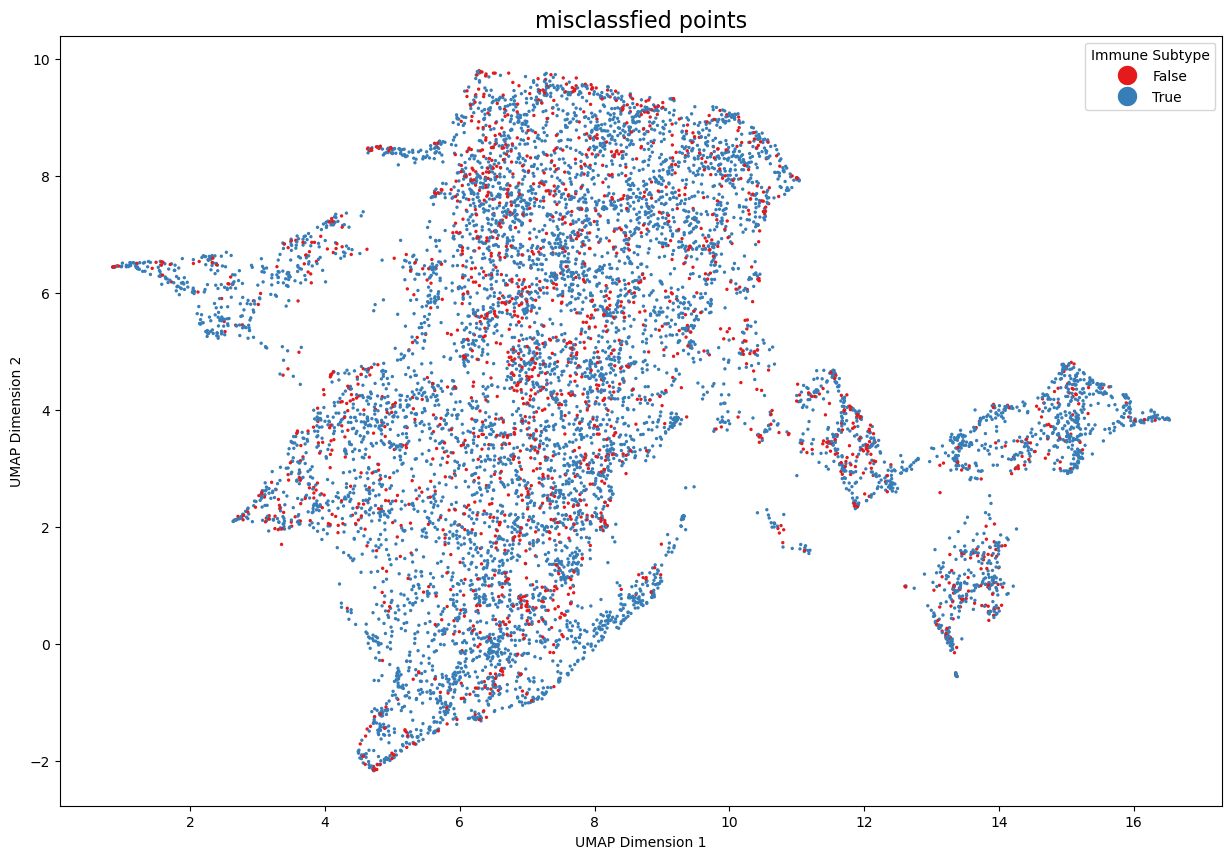

In [51]:
#setting plot size
plt.figure(figsize=(15, 10))
#setting color palate and having it change based on the unque y values
color_palette = sns.color_palette("Set1", n_colors=len(y.unique()))
color_mapping = {species: color for color, species in enumerate(y.unique())}
colors = [color_palette[color_mapping[species]] for species in y]
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors, s=2)

# Adding a legend
legend_labels = y.unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=15, markerfacecolor=color)
                  for label, color in zip(legend_labels, color_palette)]
plt.legend(handles=legend_handles, title="Immune Subtype")

plt.title('misclassfied points', fontsize=16)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

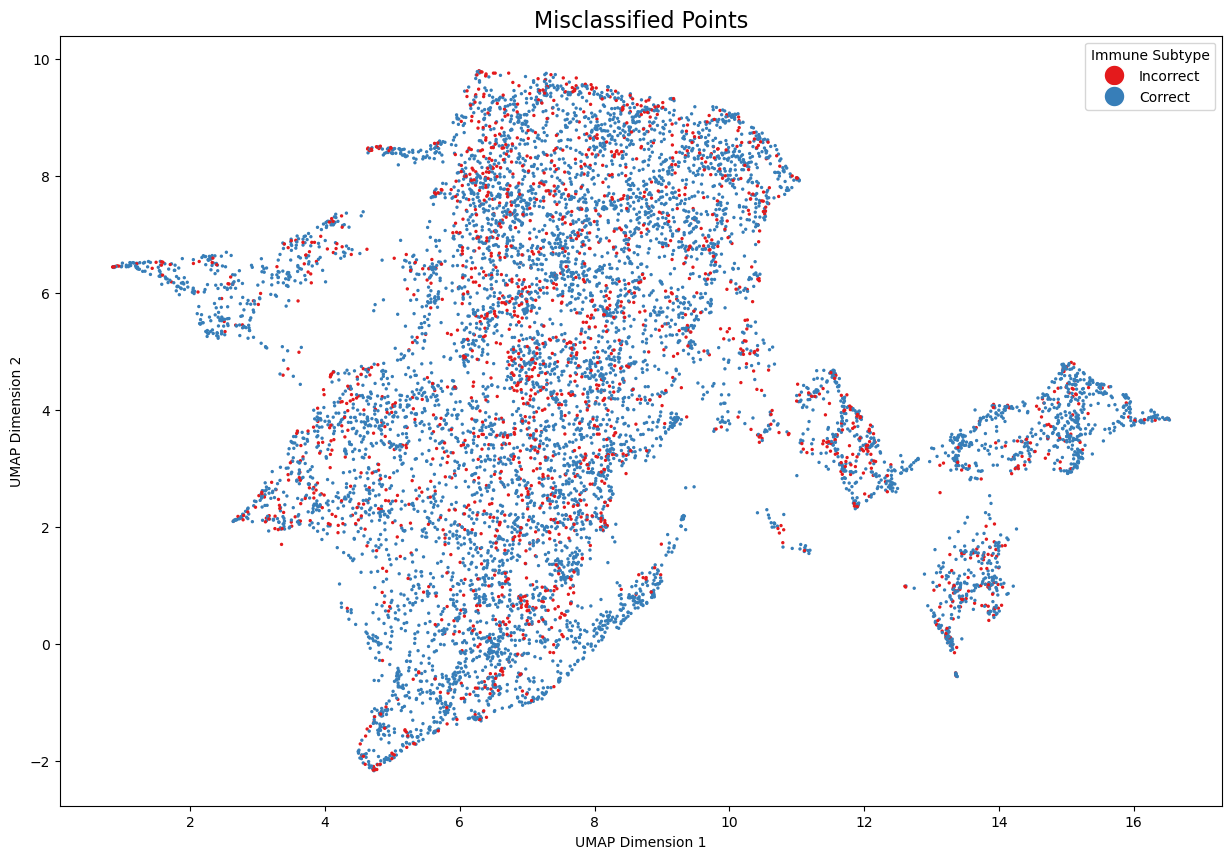

In [52]:
#setting plot size
plt.figure(figsize=(15, 10))

# Setting color palette and having it change based on the unique y values
color_palette = sns.color_palette("Set1", n_colors=len(y.unique()))
color_mapping = {species: color for color, species in enumerate(y.unique())}
colors = [color_palette[color_mapping[species]] for species in y]

# Scatter plot with custom colors based on unique values
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors, s=2)

# Adding a legend with customized labels
legend_labels = ["Incorrect", "Correct"]  # Custom labels for True and False
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=15, markerfacecolor=color)
    for label, color in zip(legend_labels, color_palette)
]

plt.legend(handles=legend_handles, title="Immune Subtype")

plt.title('Misclassified Points', fontsize=16)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()


## Finding out how many of each subtype we got wrong

In [53]:
misclassified_values = df_sorted[df_sorted['correct_prediction'] != True]

In [54]:
misclassified_values

,tcga_participant_barcode,immune_subtype,ENSG00000000003,ENSG00000000938,ENSG00000002549,ENSG00000002726,ENSG00000002933,ENSG00000004468,ENSG00000005302,ENSG00000006062,...,ENSG00000266074,ENSG00000267467,ENSG00000269404,ENSG00000270999,ENSG00000271503,ENSG00000273749,ENSG00000274736,ENSG00000275385,ENSG00000276566,correct_prediction
1921,TCGA-3B-A9HP,C1,11.594583,4.406692,67.946749,0.465439,84.156429,0.760922,18.264237,13.746092,...,9.898479,0.092957,3.082746,0.000000,40.135650,41.826091,0.399227,1.928391,0.000000,False
2279,TCGA-CR-7376,C1,11.853537,23.556470,246.202681,3.133096,109.622637,12.854348,20.080413,11.018988,...,6.512352,0.306780,3.033516,0.000000,260.473300,78.868003,2.458698,527.259000,16.998200,False
2266,TCGA-CN-5358,C1,8.477697,15.378510,80.043831,4.656138,65.368722,11.394050,15.349746,6.908746,...,4.445599,0.170514,4.426973,0.000000,69.645900,52.915022,3.623574,215.355900,5.541000,False
2235,TCGA-CD-A489,C1,15.492053,3.907638,43.492125,71.333471,340.335690,2.528373,21.526471,13.695313,...,4.850209,0.070641,4.977204,0.000000,45.757330,41.183135,0.870005,19.072900,0.000000,False
2208,TCGA-BR-8362,C1,46.041849,3.497281,70.826107,242.324009,170.500683,5.554486,13.414675,14.620036,...,6.973888,0.419696,3.430943,0.426175,51.856214,67.668343,0.782003,44.368520,0.439933,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826,TCGA-AR-A0TT,C6,3.706540,10.106416,158.210769,0.632195,51.345266,21.378058,31.268695,8.503381,...,1.324405,0.173291,7.536303,0.298645,100.529080,57.968099,0.657303,15.845610,26.597400,False
4831,TCGA-AR-A24T,C6,41.825828,2.552468,116.600487,0.214475,67.465646,1.279970,22.413583,5.803060,...,2.024873,0.624021,0.795011,0.648174,22.903493,44.155038,0.183690,0.772245,15.320300,False
8648,TCGA-E9-A1R3,C6,25.487009,6.408825,48.545101,0.904519,77.909946,0.551660,26.351628,5.753635,...,3.216982,0.268924,0.861924,0.000000,15.121620,76.523070,0.084260,9.001380,0.000000,False
2263,TCGA-CM-5348,C6,17.579842,18.383990,58.624171,110.464455,587.231955,1.007275,12.436026,8.946199,...,4.060936,0.465955,0.895588,0.196406,15.143496,64.205272,2.138957,35.317700,0.000000,False


In [55]:
value_counts = misclassified_values['immune_subtype'].value_counts()

print(value_counts)


C4    477
C3    394
C1    385
C2    348
C6    179
C5     49
Name: immune_subtype, dtype: int64


# Making the Kaplan Meier Plot 

### Combining DF with TCGA Diagnosis to Death Records

In [58]:
km_ds = pd.read_csv('tcga_days_to_death.tsv', delimiter='\t')
km_ds

,Unnamed: 0,vital_status,last_follow_up,days_to_death
0,TCGA-AG-A00C,Alive,183.0,NaN
1,TCGA-DY-A1DE,Alive,3932.0,NaN
2,TCGA-EI-6917,Alive,531.0,NaN
3,TCGA-DY-A0XA,Alive,3846.0,NaN
4,TCGA-AG-A01W,Alive,0.0,NaN
...,...,...,...,...
11162,TCGA-VQ-A8PD,Dead,NaN,496.0
11163,TCGA-MX-A5UJ,Alive,600.0,NaN
11164,TCGA-BR-6564,Dead,25.0,794.0
11165,TCGA-BR-4191,Dead,0.0,558.0


In [59]:
km_df=pd.merge(km_ds, df, left_on='Unnamed: 0', right_on='tcga_participant_barcode', how='inner')
km_df = km_df.drop(columns=['Unnamed: 0'],axis=1)
km_df

,vital_status,last_follow_up,days_to_death,tcga_participant_barcode,immune_subtype,ENSG00000000003,ENSG00000000938,ENSG00000002549,ENSG00000002726,ENSG00000002933,...,ENSG00000265972,ENSG00000266074,ENSG00000267467,ENSG00000269404,ENSG00000270999,ENSG00000271503,ENSG00000273749,ENSG00000274736,ENSG00000275385,ENSG00000276566
0,Alive,183.0,NaN,TCGA-AG-A00C,C1,101.059923,0.743907,50.028904,83.382350,173.981564,...,145.406350,0.560705,0.610468,1.311974,0.000000,8.138839,52.689503,0.000000,0.000000,0.000000
1,Alive,3932.0,NaN,TCGA-DY-A1DE,C2,85.974465,3.376868,79.330918,59.197166,263.984183,...,166.477055,4.099854,0.446600,0.728892,0.000000,15.372278,35.591649,0.187882,21.164840,2.981990
2,Alive,531.0,NaN,TCGA-EI-6917,C2,36.913733,16.872247,127.246808,2.279281,63.893499,...,165.488560,4.006222,0.419040,1.867048,0.000000,41.439120,74.777981,1.071329,66.944800,1.347520
3,Alive,3846.0,NaN,TCGA-DY-A0XA,C1,139.394730,1.173850,43.763763,35.680645,220.108655,...,114.543006,3.146026,0.139431,0.670389,0.268606,9.193690,44.273660,0.000000,2.648580,0.542517
4,Alive,0.0,NaN,TCGA-AG-A01W,C2,125.349748,1.623721,77.420243,64.624579,132.862677,...,81.202005,0.745667,0.000000,2.045478,0.000000,26.508600,82.979664,0.416056,27.315950,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8975,Dead,NaN,496.0,TCGA-VQ-A8PD,C6,12.819064,10.254870,88.777513,73.927260,107.431224,...,424.846700,4.878343,0.889289,9.168937,0.000000,64.784650,58.018390,0.488248,5.272119,6.634770
8976,Alive,600.0,NaN,TCGA-MX-A5UJ,C2,22.607103,2.205309,83.747523,125.629626,172.059724,...,130.547210,4.919111,0.000000,4.768798,0.000000,12.359134,37.590533,2.001120,27.883950,262.893000
8977,Dead,25.0,794.0,TCGA-BR-6564,C2,2.873285,1.309684,39.512099,13.634084,54.408307,...,136.849050,4.073690,0.118451,1.552021,0.000000,20.850768,15.882302,0.397331,0.157075,2.385840
8978,Dead,0.0,558.0,TCGA-BR-4191,C2,63.219980,8.709484,91.951096,20.269530,175.324608,...,191.499660,1.275994,1.096618,3.224097,3.671290,63.136480,53.714069,1.275257,60.263500,4.565630


In [60]:
km_df['vital_status'].unique()

array(['Alive', 'Dead', 'Not Reported'], dtype=object)

In [61]:
km_df

,vital_status,last_follow_up,days_to_death,tcga_participant_barcode,immune_subtype,ENSG00000000003,ENSG00000000938,ENSG00000002549,ENSG00000002726,ENSG00000002933,...,ENSG00000265972,ENSG00000266074,ENSG00000267467,ENSG00000269404,ENSG00000270999,ENSG00000271503,ENSG00000273749,ENSG00000274736,ENSG00000275385,ENSG00000276566
0,Alive,183.0,NaN,TCGA-AG-A00C,C1,101.059923,0.743907,50.028904,83.382350,173.981564,...,145.406350,0.560705,0.610468,1.311974,0.000000,8.138839,52.689503,0.000000,0.000000,0.000000
1,Alive,3932.0,NaN,TCGA-DY-A1DE,C2,85.974465,3.376868,79.330918,59.197166,263.984183,...,166.477055,4.099854,0.446600,0.728892,0.000000,15.372278,35.591649,0.187882,21.164840,2.981990
2,Alive,531.0,NaN,TCGA-EI-6917,C2,36.913733,16.872247,127.246808,2.279281,63.893499,...,165.488560,4.006222,0.419040,1.867048,0.000000,41.439120,74.777981,1.071329,66.944800,1.347520
3,Alive,3846.0,NaN,TCGA-DY-A0XA,C1,139.394730,1.173850,43.763763,35.680645,220.108655,...,114.543006,3.146026,0.139431,0.670389,0.268606,9.193690,44.273660,0.000000,2.648580,0.542517
4,Alive,0.0,NaN,TCGA-AG-A01W,C2,125.349748,1.623721,77.420243,64.624579,132.862677,...,81.202005,0.745667,0.000000,2.045478,0.000000,26.508600,82.979664,0.416056,27.315950,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8975,Dead,NaN,496.0,TCGA-VQ-A8PD,C6,12.819064,10.254870,88.777513,73.927260,107.431224,...,424.846700,4.878343,0.889289,9.168937,0.000000,64.784650,58.018390,0.488248,5.272119,6.634770
8976,Alive,600.0,NaN,TCGA-MX-A5UJ,C2,22.607103,2.205309,83.747523,125.629626,172.059724,...,130.547210,4.919111,0.000000,4.768798,0.000000,12.359134,37.590533,2.001120,27.883950,262.893000
8977,Dead,25.0,794.0,TCGA-BR-6564,C2,2.873285,1.309684,39.512099,13.634084,54.408307,...,136.849050,4.073690,0.118451,1.552021,0.000000,20.850768,15.882302,0.397331,0.157075,2.385840
8978,Dead,0.0,558.0,TCGA-BR-4191,C2,63.219980,8.709484,91.951096,20.269530,175.324608,...,191.499660,1.275994,1.096618,3.224097,3.671290,63.136480,53.714069,1.275257,60.263500,4.565630


In [62]:
km_df2 = km_df.dropna(subset=['days_to_death'])
km_df2

,vital_status,last_follow_up,days_to_death,tcga_participant_barcode,immune_subtype,ENSG00000000003,ENSG00000000938,ENSG00000002549,ENSG00000002726,ENSG00000002933,...,ENSG00000265972,ENSG00000266074,ENSG00000267467,ENSG00000269404,ENSG00000270999,ENSG00000271503,ENSG00000273749,ENSG00000274736,ENSG00000275385,ENSG00000276566
20,Dead,0.0,303.0,TCGA-F5-6464,C1,22.369909,8.489547,118.079762,59.797677,68.669178,...,486.577621,4.317063,0.141556,2.363292,0.000000,45.625610,77.402087,0.396210,80.116900,0.461065
25,Dead,21.0,1314.0,TCGA-AH-6643,C1,65.319700,2.841025,37.487143,84.539769,445.685264,...,455.528220,1.770381,0.330753,0.526805,1.203460,5.385347,36.800696,0.225975,2.110487,0.000000
33,Dead,452.0,869.0,TCGA-F5-6702,C1,135.237640,5.132837,56.197460,165.389042,353.890990,...,312.251810,2.811334,0.242215,0.878868,0.129107,15.752680,52.158878,1.261950,93.383000,18.212300
36,Dead,23.0,361.0,TCGA-F5-6863,C1,104.096440,0.878339,50.621007,113.828891,529.051020,...,168.133453,5.149245,0.261750,0.524302,0.000000,6.119440,52.287536,0.090002,2.172525,0.000000
44,Dead,31.0,1096.0,TCGA-AG-3582,C1,219.336782,3.887703,50.549402,107.554910,370.710706,...,134.964740,4.421731,0.000000,0.389253,0.000000,8.820840,51.681057,0.000000,18.040750,0.367395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,Dead,NaN,281.0,TCGA-R5-A805,C2,12.631167,13.748817,48.295470,105.012763,117.378837,...,89.573652,2.052962,0.195859,51.602854,0.297726,24.439940,35.034293,6.788706,246.898600,0.065677
8975,Dead,NaN,496.0,TCGA-VQ-A8PD,C6,12.819064,10.254870,88.777513,73.927260,107.431224,...,424.846700,4.878343,0.889289,9.168937,0.000000,64.784650,58.018390,0.488248,5.272119,6.634770
8977,Dead,25.0,794.0,TCGA-BR-6564,C2,2.873285,1.309684,39.512099,13.634084,54.408307,...,136.849050,4.073690,0.118451,1.552021,0.000000,20.850768,15.882302,0.397331,0.157075,2.385840
8978,Dead,0.0,558.0,TCGA-BR-4191,C2,63.219980,8.709484,91.951096,20.269530,175.324608,...,191.499660,1.275994,1.096618,3.224097,3.671290,63.136480,53.714069,1.275257,60.263500,4.565630


In [63]:
km_df2

,vital_status,last_follow_up,days_to_death,tcga_participant_barcode,immune_subtype,ENSG00000000003,ENSG00000000938,ENSG00000002549,ENSG00000002726,ENSG00000002933,...,ENSG00000265972,ENSG00000266074,ENSG00000267467,ENSG00000269404,ENSG00000270999,ENSG00000271503,ENSG00000273749,ENSG00000274736,ENSG00000275385,ENSG00000276566
20,Dead,0.0,303.0,TCGA-F5-6464,C1,22.369909,8.489547,118.079762,59.797677,68.669178,...,486.577621,4.317063,0.141556,2.363292,0.000000,45.625610,77.402087,0.396210,80.116900,0.461065
25,Dead,21.0,1314.0,TCGA-AH-6643,C1,65.319700,2.841025,37.487143,84.539769,445.685264,...,455.528220,1.770381,0.330753,0.526805,1.203460,5.385347,36.800696,0.225975,2.110487,0.000000
33,Dead,452.0,869.0,TCGA-F5-6702,C1,135.237640,5.132837,56.197460,165.389042,353.890990,...,312.251810,2.811334,0.242215,0.878868,0.129107,15.752680,52.158878,1.261950,93.383000,18.212300
36,Dead,23.0,361.0,TCGA-F5-6863,C1,104.096440,0.878339,50.621007,113.828891,529.051020,...,168.133453,5.149245,0.261750,0.524302,0.000000,6.119440,52.287536,0.090002,2.172525,0.000000
44,Dead,31.0,1096.0,TCGA-AG-3582,C1,219.336782,3.887703,50.549402,107.554910,370.710706,...,134.964740,4.421731,0.000000,0.389253,0.000000,8.820840,51.681057,0.000000,18.040750,0.367395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,Dead,NaN,281.0,TCGA-R5-A805,C2,12.631167,13.748817,48.295470,105.012763,117.378837,...,89.573652,2.052962,0.195859,51.602854,0.297726,24.439940,35.034293,6.788706,246.898600,0.065677
8975,Dead,NaN,496.0,TCGA-VQ-A8PD,C6,12.819064,10.254870,88.777513,73.927260,107.431224,...,424.846700,4.878343,0.889289,9.168937,0.000000,64.784650,58.018390,0.488248,5.272119,6.634770
8977,Dead,25.0,794.0,TCGA-BR-6564,C2,2.873285,1.309684,39.512099,13.634084,54.408307,...,136.849050,4.073690,0.118451,1.552021,0.000000,20.850768,15.882302,0.397331,0.157075,2.385840
8978,Dead,0.0,558.0,TCGA-BR-4191,C2,63.219980,8.709484,91.951096,20.269530,175.324608,...,191.499660,1.275994,1.096618,3.224097,3.671290,63.136480,53.714069,1.275257,60.263500,4.565630


### Changing Dead/Alive to Binary so Lifelines can read it

In [64]:
km_df2['vital_status_binary'] = km_df2['vital_status'].replace('Dead', 1.0)

km_df2.head()

/var/folders/f2/s93pnt0d3hxdjkhfxs6gb1l1rb54ft/T/ipykernel_51572/1417973569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  km_df2['vital_status_binary'] = km_df2['vital_status'].replace('Dead', 1.0)


,vital_status,last_follow_up,days_to_death,tcga_participant_barcode,immune_subtype,ENSG00000000003,ENSG00000000938,ENSG00000002549,ENSG00000002726,ENSG00000002933,...,ENSG00000266074,ENSG00000267467,ENSG00000269404,ENSG00000270999,ENSG00000271503,ENSG00000273749,ENSG00000274736,ENSG00000275385,ENSG00000276566,vital_status_binary
20,Dead,0.0,303.0,TCGA-F5-6464,C1,22.369909,8.489547,118.079762,59.797677,68.669178,...,4.317063,0.141556,2.363292,0.000000,45.625610,77.402087,0.396210,80.116900,0.461065,1.0
25,Dead,21.0,1314.0,TCGA-AH-6643,C1,65.319700,2.841025,37.487143,84.539769,445.685264,...,1.770381,0.330753,0.526805,1.203460,5.385347,36.800696,0.225975,2.110487,0.000000,1.0
33,Dead,452.0,869.0,TCGA-F5-6702,C1,135.237640,5.132837,56.197460,165.389042,353.890990,...,2.811334,0.242215,0.878868,0.129107,15.752680,52.158878,1.261950,93.383000,18.212300,1.0
36,Dead,23.0,361.0,TCGA-F5-6863,C1,104.096440,0.878339,50.621007,113.828891,529.051020,...,5.149245,0.261750,0.524302,0.000000,6.119440,52.287536,0.090002,2.172525,0.000000,1.0
44,Dead,31.0,1096.0,TCGA-AG-3582,C1,219.336782,3.887703,50.549402,107.554910,370.710706,...,4.421731,0.000000,0.389253,0.000000,8.820840,51.681057,0.000000,18.040750,0.367395,1.0


In [65]:
km_df2['immune_subtype'].unique()

array(['C1', 'C3', 'C2', 'C4', 'C6', 'C5'], dtype=object)

## Making the Kaplan Meier Plot

In [66]:
kmf = KaplanMeierFitter()

In [67]:
kmf1= KaplanMeierFitter()
kmf2= KaplanMeierFitter()
kmf3= KaplanMeierFitter()
kmf4= KaplanMeierFitter()
kmf5= KaplanMeierFitter()
kmf6= KaplanMeierFitter()

In [68]:
C1 = km_df2[km_df2['immune_subtype']=='C1']
C2 = km_df2[km_df2['immune_subtype']=='C2']
C3 = km_df2[km_df2['immune_subtype']=='C3']
C4 = km_df2[km_df2['immune_subtype']=='C4']
C5 = km_df2[km_df2['immune_subtype']=='C5']
C6 = km_df2[km_df2['immune_subtype']=='C6']

In [69]:
C1

,vital_status,last_follow_up,days_to_death,tcga_participant_barcode,immune_subtype,ENSG00000000003,ENSG00000000938,ENSG00000002549,ENSG00000002726,ENSG00000002933,...,ENSG00000266074,ENSG00000267467,ENSG00000269404,ENSG00000270999,ENSG00000271503,ENSG00000273749,ENSG00000274736,ENSG00000275385,ENSG00000276566,vital_status_binary
20,Dead,0.0,303.0,TCGA-F5-6464,C1,22.369909,8.489547,118.079762,59.797677,68.669178,...,4.317063,0.141556,2.363292,0.000000,45.625610,77.402087,0.396210,80.116900,0.461065,1.0
25,Dead,21.0,1314.0,TCGA-AH-6643,C1,65.319700,2.841025,37.487143,84.539769,445.685264,...,1.770381,0.330753,0.526805,1.203460,5.385347,36.800696,0.225975,2.110487,0.000000,1.0
33,Dead,452.0,869.0,TCGA-F5-6702,C1,135.237640,5.132837,56.197460,165.389042,353.890990,...,2.811334,0.242215,0.878868,0.129107,15.752680,52.158878,1.261950,93.383000,18.212300,1.0
36,Dead,23.0,361.0,TCGA-F5-6863,C1,104.096440,0.878339,50.621007,113.828891,529.051020,...,5.149245,0.261750,0.524302,0.000000,6.119440,52.287536,0.090002,2.172525,0.000000,1.0
44,Dead,31.0,1096.0,TCGA-AG-3582,C1,219.336782,3.887703,50.549402,107.554910,370.710706,...,4.421731,0.000000,0.389253,0.000000,8.820840,51.681057,0.000000,18.040750,0.367395,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8951,Dead,NaN,491.0,TCGA-VQ-AA6I,C1,8.119302,2.488953,80.043722,30.550431,41.918864,...,2.408966,0.223595,1.233902,0.738417,25.656321,63.864816,0.203107,12.319040,0.000000,1.0
8959,Dead,NaN,562.0,TCGA-VQ-A8E0,C1,11.694873,5.762591,54.864950,27.110362,136.786401,...,8.777465,0.294958,2.810255,0.000000,9.684993,98.891927,0.768189,38.771220,0.000000,1.0
8961,Dead,820.0,832.0,TCGA-VQ-A8PU,C1,8.652902,1.090504,57.104498,173.102834,518.082295,...,6.553138,0.237851,0.576378,0.000000,7.297779,80.454824,0.063347,1.491245,0.257043,1.0
8969,Dead,24.0,273.0,TCGA-BR-A4IZ,C1,13.952444,6.887970,70.294437,12.224433,183.585844,...,7.506633,0.266610,12.044130,0.000000,48.877790,43.252205,2.678053,66.913770,0.809267,1.0


In [70]:
kmf1.fit(durations = C1['days_to_death'], event_observed = C1['vital_status_binary'], label = 'C1')
kmf2.fit(durations = C2['days_to_death'], event_observed = C2['vital_status_binary'], label = 'C2')
kmf3.fit(durations = C3['days_to_death'], event_observed = C3['vital_status_binary'], label = 'C3')
kmf4.fit(durations = C4['days_to_death'], event_observed = C4['vital_status_binary'], label = 'C4')
kmf5.fit(durations = C5['days_to_death'], event_observed = C5['vital_status_binary'], label = 'C5')
kmf6.fit(durations = C6['days_to_death'], event_observed = C6['vital_status_binary'], label = 'C6')

<lifelines.KaplanMeierFitter:"C6", fitted with 73 total observations, 0 right-censored observations>

In [71]:
kmf1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,9,9,0,730,730
1.0,2,2,0,0,721
3.0,1,1,0,0,719
5.0,2,2,0,0,718
6.0,1,1,0,0,716
...,...,...,...,...,...
3924.0,1,1,0,0,5
3941.0,1,1,0,0,4
4624.0,1,1,0,0,3


In [72]:
kmf1.predict(10)

0.9753424657534246

In [73]:
kmf4.predict(10)

0.9855421686746996

In [74]:
kmf1.survival_function_

,C1
timeline,
0.0,0.987671
1.0,0.984932
3.0,0.983562
5.0,0.980822
6.0,0.979452
...,...
3924.0,0.005479
3941.0,0.004110
4624.0,0.002740


Text(0.5, 1.0, 'Immune Subtype Significance')

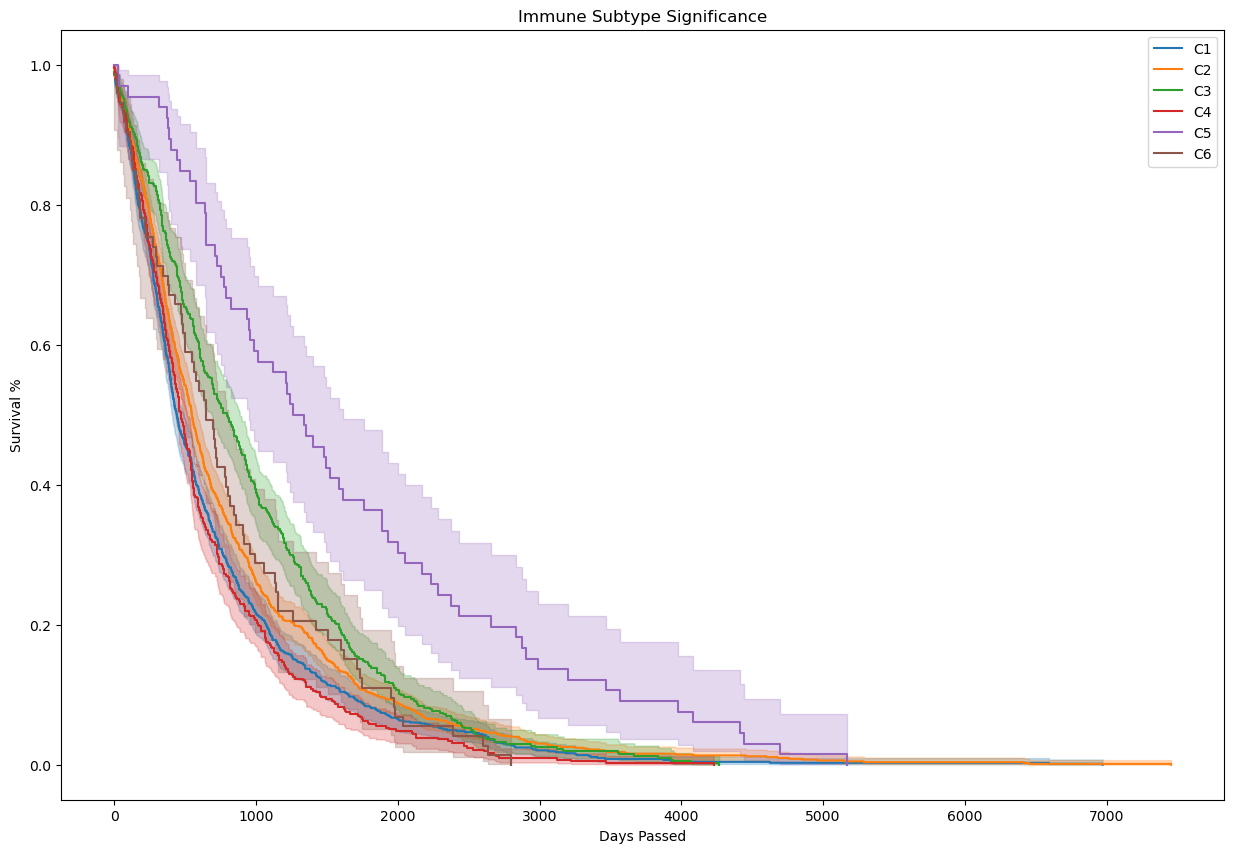

In [75]:
plt.figure(figsize=(15, 10))

kmf1.plot()
kmf2.plot()
kmf3.plot()
kmf4.plot()
kmf5.plot()
kmf6.plot()

sns.set_palette("tab10")

plt.xlabel('Days Passed')
plt.ylabel('Survival %')
plt.title('Immune Subtype Significance')

# Simpflied Way To Plot

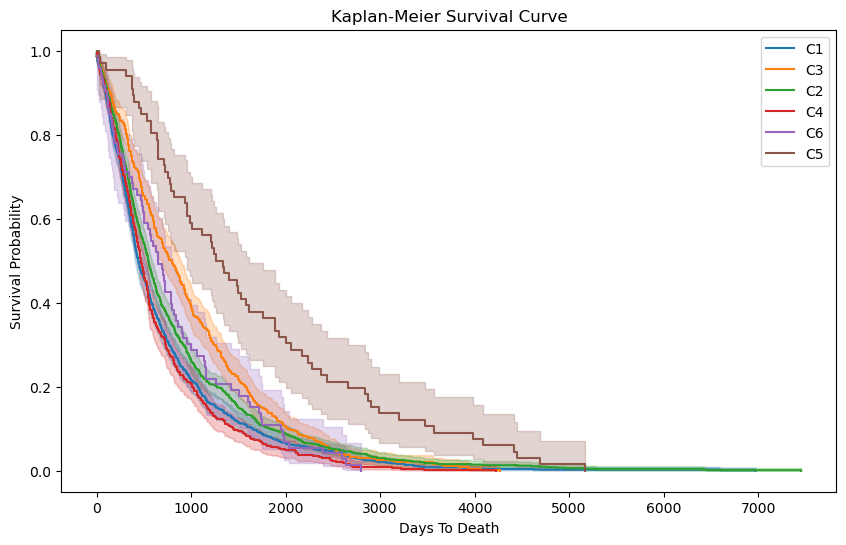

In [76]:
plt.figure(figsize=(10, 6))

# Get unique group labels
unique_groups = km_df2['immune_subtype'].unique()

# Loop through each group and fit Kaplan-Meier
for group in unique_groups:
    subset_data = km_df2[km_df2['immune_subtype'] == group]
    kmf.fit(subset_data['days_to_death'], event_observed=subset_data['vital_status_binary'])
    kmf.plot(label=group)

# Customize the plot
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Days To Death')
plt.ylabel('Survival Probability')
plt.legend()

# Show the plot
plt.show()
